# Salario Developer

Este dataset contiene informacion de una encuesta a desarrolladores. Conestos datos podremos predecir el salario que debe obtener un desarrollador en funcion de los datos proporcionados como el pais, los estudios o la experiencia.

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

## EDA

In [2]:
# Importamos los datos
df=pd.read_csv("data/datos.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
# Vemos los registros y columnas que tenemos
print(f"Numero de registros: {df.shape[0]}\nNumero de columnas: {df.shape[1]}")

Numero de registros: 64461
Numero de columnas: 61


In [4]:
# Nos quedamos con las columnas que nos interesan
df=df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedComp
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [5]:
# Renombramos las columnas
df=df.rename({"Country":"Pais","EdLevel":"Estudios", "YearsCodePro":"Experiencia", "Employment":"Empleo", "ConvertedComp":"Salario"}, axis=1)
df.head()

,Pais,Estudios,Experiencia,Empleo,Salario
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [6]:
# Eliminamos los que no tengan salario (Nulo)
df=df[~df["Salario"].isnull()]
df.head()

,Pais,Estudios,Experiencia,Empleo,Salario
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [7]:
# Vemos los registros y columnas que tenemos tras esta primera limpieza
print(f"Numero de registros: {df.shape[0]}\nNumero de columnas: {df.shape[1]}")

Numero de registros: 34756
Numero de columnas: 5


In [8]:
# Vemos si hay valores nulos en las columnas
df.isnull().sum()

Pais             0
Estudios       568
Experiencia    135
Empleo          39
Salario          0
dtype: int64

In [9]:
# Eliminamos los nulos (aunque podriamos haber utilizado alguna tecnica de imputacion)
df=df.dropna()
df.isnull().sum()

Pais           0
Estudios       0
Experiencia    0
Empleo         0
Salario        0
dtype: int64

In [10]:
# Vemos los diferentes tipos de empleos que hay
df["Empleo"].value_counts()

Empleo
Employed full-time                                      30019
Independent contractor, freelancer, or self-employed     2998
Employed part-time                                       1008
Name: count, dtype: int64

In [11]:
# Nos quedamos unicamente con los empleos full-time
df=df[df["Empleo"]=="Employed full-time"]
df["Empleo"].value_counts()

Empleo
Employed full-time    30019
Name: count, dtype: int64

In [12]:
# Eliminamos la columna de los empleos ya que todos son full-time y no aporta valor
df=df.drop("Empleo", axis=1)
df.head()

,Pais,Estudios,Experiencia,Salario
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [13]:
# Vemos los diferentes paises que hay
df["Pais"].value_counts()

Pais
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [14]:
# Obtenemos los paises que son menores que un valor limite
paises=df["Pais"].value_counts()
paises_df=paises[paises<=400]
paises_otros=list(paises_df.index)
print(f"Registros de paises que estaran en otros: {paises_df.sum()}")

Registros de paises que estaran en otros: 8549


In [15]:
# Reemplazamos esos paises por la categoria otros
for pais in paises_otros:
    df.loc[df["Pais"]==pais, "Pais"]="Otros"

In [16]:
# Observamos que se ha realizado correctamente
paises_otros=df[df["Pais"]=="Otros"]
print(f"Registros de paises que estan en otros: {len(paises_otros)}")

Registros de paises que estan en otros: 8549


In [17]:
# Vemos nuevamente los diferentes paises que hay
df["Pais"].value_counts()

Pais
Otros                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

<Figure size 1440x864 with 0 Axes>

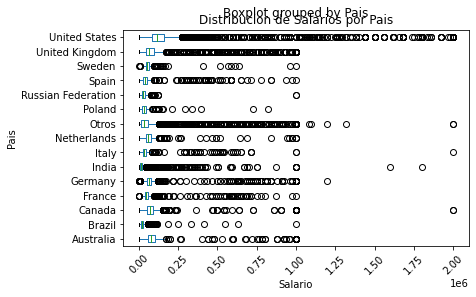

In [18]:
# Vemos un grafico de los salarios por pais
plt.figure(figsize=(20, 12))
df.boxplot(column="Salario", by="Pais", grid=False, vert=False)
plt.ylabel("Pais")
plt.xlabel("Salario")
plt.title("Distribucion de Salarios por Pais")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Obtenemos los registros que tengan un salaro de entre 10.000 y 250.000
df=df[(df["Salario"]<=250000)&(df["Salario"]>=10000)]
df.head()

,Pais,Estudios,Experiencia,Salario
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [20]:
# Eliminamos los registros que tengan como pais otros
df=df[df["Pais"]!="Otros"]

In [21]:
# Observamos que se ha realizado correctamente
paises_otros=df[df["Pais"]=="Otros"]
print(f"Registros de paises que estan en otros: {len(paises_otros)}")

Registros de paises que estan en otros: 0


<Figure size 1440x864 with 0 Axes>

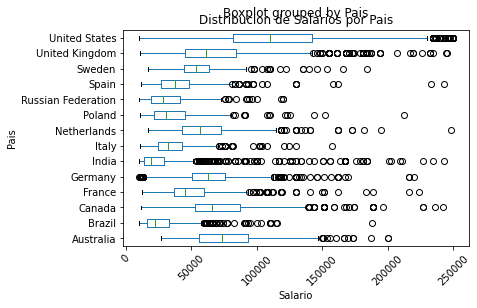

In [22]:
# Vemos un grafico de los salarios por pais nuevamente
plt.figure(figsize=(20, 12))
df.boxplot(column="Salario", by="Pais", grid=False, vert=False)
plt.ylabel("Pais")
plt.xlabel("Salario")
plt.title("Distribucion de Salarios por Pais")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Vemos los diferentes valores de experiencia que hay
df["Experiencia"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [24]:
# Reemplazamos los valores de menos de un año por 0.5, mas de 50 por 50 y lo pasamos a float
def limpiarExperiencia(valor:str)->float:

    if valor=="Less than 1 year":
        return 0.5
        
    elif valor=="More than 50 years":
        return 50
        
    else:
        return float(valor)

In [25]:
df["Experiencia"]=df["Experiencia"].apply(limpiarExperiencia)

In [26]:
# Comprobamos que se ha realizado correctamente
df["Experiencia"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [27]:
# Vemos los diferentes valores de estudios que hay
df["Estudios"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [28]:
# Reemplazamos los valores de los estudios para tenerlos mas limpios
def limpiarEstudios(estudio:str)->str:

    if "Bachelor’s degree" in estudio:
        return "Titulacion universitaria"

    elif "Master’s degree" in estudio:
        return "Titulacion de master"

    elif "Professional degree" in estudio or "Other doctoral degree" in estudio:
        return "Post grado"

    else:
        return "Sin titulacion universitaria"

In [29]:
df["Estudios"]=df["Estudios"].apply(limpiarEstudios)

In [30]:
# Comprobamos que se ha realizado correctamente
df["Estudios"].unique()

array(['Titulacion universitaria', 'Titulacion de master',
       'Sin titulacion universitaria', 'Post grado'], dtype=object)

## Seleccion del modelo

In [31]:
df_entrenar=df.copy()

In [32]:
# Realizamos un encoder de los estudios para pasarlo a numeros
le_estudios=LabelEncoder()
df_entrenar["Estudios"]=le_estudios.fit_transform(df_entrenar["Estudios"])
df_entrenar["Estudios"].unique()

array([3, 2, 1, 0])

In [33]:
# Vemos que valor esta asociado a cada uno
le_estudios.classes_

array(['Post grado', 'Sin titulacion universitaria',
       'Titulacion de master', 'Titulacion universitaria'], dtype=object)

In [34]:
# Realizamos un encoder de los paises para pasarlo a numeros
le_paises=LabelEncoder()
df_entrenar["Pais"]=le_paises.fit_transform(df_entrenar["Pais"])
df_entrenar["Pais"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [35]:
# Vemos que valor esta asociado a cada uno
le_paises.classes_

array(['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
       'Italy', 'Netherlands', 'Poland', 'Russian Federation', 'Spain',
       'Sweden', 'United Kingdom', 'United States'], dtype=object)

In [36]:
# Separamos la variable de entrada (X) y salida (y)
X=df_entrenar[["Pais","Estudios","Experiencia"]]
y=df_entrenar["Salario"]

In [37]:
X.head()

,Pais,Estudios,Experiencia
7,13,3,13.0
9,12,2,4.0
10,12,3,2.0
11,10,1,7.0
12,7,1,20.0


In [38]:
y.head()

7     116000.0
9      32315.0
10     40070.0
11     14268.0
12     38916.0
Name: Salario, dtype: float64

In [39]:
# Realizamos la separacion de nuestros datos en entrenamiento y test
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
# Creamos unos objetos modelo vacios para entrenarlos y ver que buenos son
modelos=[("Regresion", LinearRegression()),
         ("Arbol", DecisionTreeRegressor(random_state=0)),
         ("Random Forest", RandomForestRegressor(random_state=0))]

In [41]:
# Iteramos por los modelos 
for nombre, modelo in modelos:

    # Entrenamos el modelo con los datos de entrenamiento
    modelo.fit(X_entrenamiento,y_entrenamiento)

    # Obtenemos el score
    score=modelo.score(X_test, y_test)

    # Realizamos las predicciones con el test
    y_prediccion=modelo.predict(X_test)

    # Obtenemos el error
    error=np.sqrt(mean_squared_error(y_test, y_prediccion))

    print(f"Modelo: {nombre} Score: {round(score*100,2)} Error: {round(error,2)}$")

Modelo: Regresion Score: 32.09 Error: 39274.13$
Modelo: Arbol Score: 56.28 Error: 31513.73$
Modelo: Random Forest Score: 57.18 Error: 31185.58$


## Tuneado del modelo

In [42]:
# Realizamos un tuneado de los hiperparametros creando un objeto GridSearch
parametros={"max_depth":[None,2,4,6,8,10,12]}

gs=GridSearchCV(DecisionTreeRegressor(), parametros, scoring="neg_mean_squared_error")

In [43]:
# Entrenamos el objeto GridSearch
gs.fit(X_entrenamiento, y_entrenamiento)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [44]:
# Obtenemos el modelo de los mejores parametros
gs.best_estimator_

DecisionTreeRegressor(max_depth=8)

In [45]:
# Entrenamos el modelo de los mejores parametros
modelo=gs.best_estimator_
modelo.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeRegressor(max_depth=8)

In [46]:
# Obtenemos el score
score=modelo.score(X_test, y_test)
score

0.5810433633909804

In [47]:
# Realizamos las predicciones con el test
y_prediccion=modelo.predict(X_test)

In [48]:
# Obtenemos el error
error=np.sqrt(mean_squared_error(y_test, y_prediccion))
error

30847.914441692148

## Testeo del modelo

In [49]:
df.head()

,Pais,Estudios,Experiencia,Salario
7,United States,Titulacion universitaria,13.0,116000.0
9,United Kingdom,Titulacion de master,4.0,32315.0
10,United Kingdom,Titulacion universitaria,2.0,40070.0
11,Spain,Sin titulacion universitaria,7.0,14268.0
12,Netherlands,Sin titulacion universitaria,20.0,38916.0


In [50]:
df_entrenar.head()

,Pais,Estudios,Experiencia,Salario
7,13,3,13.0,116000.0
9,12,2,4.0,32315.0
10,12,3,2.0,40070.0
11,10,1,7.0,14268.0
12,7,1,20.0,38916.0


In [51]:
# Creamos uns datos ficticios sin realizar el encoder, como nuevos datos reales
data=np.array([["United States", "Titulacion de master", 15]])
data

array([['United States', 'Titulacion de master', '15']], dtype='<U20')

In [52]:
# Aplicamos los encoders
pais=le_paises.transform(data[:,0])[0]
estudios=le_estudios.transform(data[:,1])[0]

In [53]:
# Obtenemos la data transformada
data_transf=np.array([[pais, estudios, data[:,2][0]]]).astype(float)
data_transf

array([[13.,  2., 15.]])

In [54]:
prediccion=modelo.predict(data_transf)
prediccion[0]

135845.75347222222

# Almacenado del modelo

In [55]:
#Volcamos el modelo en un archivo pickle
algoritmo={"Modelo":modelo, "Encoder Pais":le_paises, "Encoder Estudios":le_estudios}

with open("algoritmo.pkl", "wb") as archivo:

    pickle.dump(algoritmo, archivo)

In [56]:
# Comprobamos que existe el archivo
os.path.exists("algoritmo.pkl")

True